In [148]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split

from sklearn.metrics import mutual_info_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge

from sklearn.feature_extraction import DictVectorizer

import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df = pd.read_csv('data/data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [22]:
df.shape

(11914, 16)

In [23]:
cols = ["Make",
"Model",
"Year",
"Engine HP",
"Engine Cylinders",
"Transmission Type",
"Vehicle Style",
"highway MPG",
"city mpg",
"MSRP"]

In [24]:
df = df[cols]

In [25]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [26]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,msrp
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [27]:
df.isna().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [28]:
df = df.fillna(0)

In [29]:
df.isna().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [32]:
df = df.rename(columns={'msrp': 'price'})

In [33]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- `AUTOMATIC`
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`

In [36]:
df.transmission_type.mode()[0]

'AUTOMATIC'

In [35]:
df.transmission_type.value_counts()

transmission_type
AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: count, dtype: int64

answer: AUTOMATIC

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg`

In [40]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [41]:
numerical = [feature for feature in df.columns if df[feature].dtype != 'object']
numerical

['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'price']

In [42]:
corr_matrix = df[numerical].corr()
corr_matrix

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


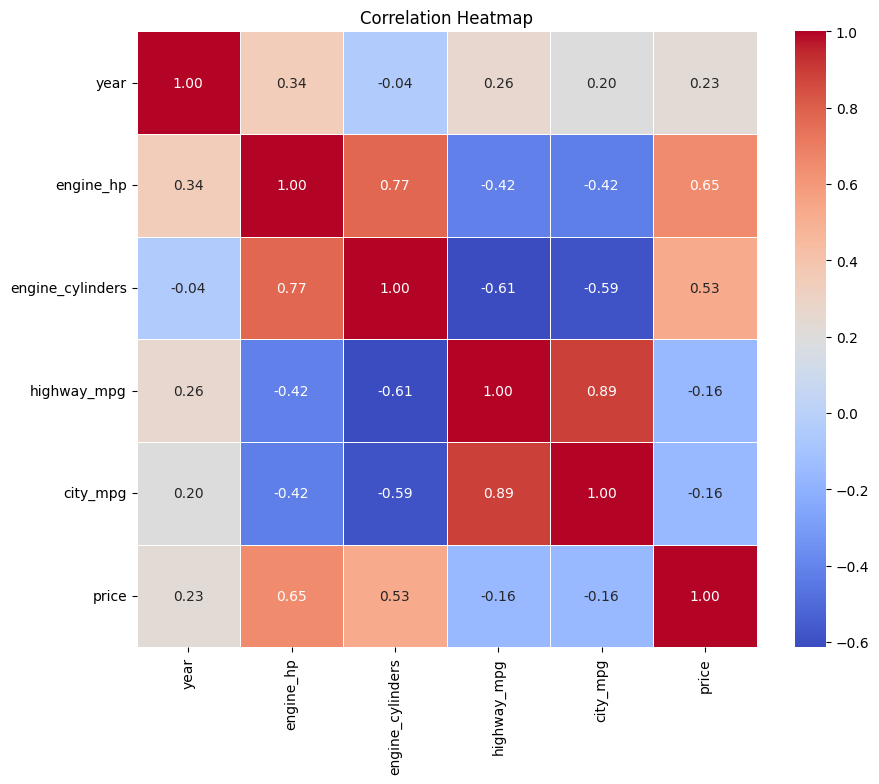

In [44]:
plt.figure(figsize=(10, 8))  # Set the figure size (adjust as needed)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

answer: highway_mpg and city_mpg

### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`price`) is not in your dataframe.

In [52]:
df['above_average'] = (df.price > df.price.mean()).astype(int)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [48]:
df.price.mean()

40594.737032063116

In [53]:
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price', 'above_average'],
      dtype='object')

In [54]:
cols_used = ['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']

In [120]:
df_train_full, df_test, y_train_full, y_test = train_test_split(df[cols_used], df['above_average'], test_size=0.2, random_state=42)

In [121]:
df_train, df_val, y_train, y_val = train_test_split(df_train_full, y_train_full, test_size=0.25, random_state=42)

In [122]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [134]:
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


In [62]:
len(y_train), len(y_val), len(y_test)

(7148, 2383, 2383)

In [63]:
y_train

3972     0
1997     0
5216     1
2805     0
11369    0
        ..
9232     0
5710     0
11306    0
4414     0
10286    0
Name: above_average, Length: 7148, dtype: int64

### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- `transmission_type`
- `vehicle_style`

In [66]:
y_train

3972     0
1997     0
5216     1
2805     0
11369    0
        ..
9232     0
5710     0
11306    0
4414     0
10286    0
Name: above_average, Length: 7148, dtype: int64

In [77]:
def mutual_info(series):
    return mutual_info_score(series, y_train)

In [79]:
mutual_info(df_train['make'])

0.23976875439118348

In [76]:
categorical = [col for col in df.columns if df[col].dtype == 'object']

In [82]:
mi = round(df_train[categorical].apply(mutual_info), 2)

In [87]:
mi.sort_values(ascending=True)

transmission_type    0.02
vehicle_style        0.08
make                 0.24
model                0.46
dtype: float64

answer: transmission_type

### Question 4

* Now let's train a logistic regression.
* Remember that we have several categorical variables in the dataset. Include them using one-hot encoding.
* Fit the model on the training dataset.
    - To make sure the results are reproducible across different versions of Scikit-Learn, fit the model with these parameters:
    - `model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)`
* Calculate the accuracy on the validation dataset and round it to 2 decimal digits.

What accuracy did you get?

- 0.60
- 0.72
- 0.84
- 0.95


In [99]:
def train_log_reg(df_train, df_val, y_train, y_val):
    dicts_train = df_train.to_dict(orient='records')
    dicts_val = df_val.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts_train)
    X_val = dv.transform(dicts_val)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

    model.fit(X_train, y_train)
    y_pred = (model.predict_proba(X_val)[:, 1] > 0.5)
    acc_score = round(accuracy_score(y_val, y_pred), 2)

    return acc_score
    

In [125]:
all_features_accuracy = train_log_reg(df_train, df_val, y_train, y_val)

0.93

In [96]:
dicts_train = df_train.to_dict(orient='records')
dicts_val = df_val.to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(dicts_train)
X_val = dv.transform(dicts_val)

model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_val)
#y_pred = (model.predict_proba(X_val)[:, 1] > 0.5)
acc_score = accuracy_score(y_val, y_pred)
acc_score

0.9345362987830466

answer: the closest choice is 0.95

### Question 5 

* Let's find the least useful feature using the *feature elimination* technique.
* Train a model with all these features (using the same parameters as in Q4).
* Now exclude each feature from this set and train a model without it. Record the accuracy for each model.
* For each feature, calculate the difference between the original accuracy and the accuracy without the feature. 

Which of following feature has the smallest difference?

- `year`
- `engine_hp`
- `transmission_type`
- `city_mpg`

> **Note**: the difference doesn't have to be positive


In [123]:
def train_log_reg_feature_elimination(df_train, df_val, y_train, y_val, feature_to_eliminate):
    df_train = df_train.copy()
    df_val = df_val.copy()
    
    del df_train[feature_to_eliminate]
    del df_val[feature_to_eliminate]
    
    dicts_train = df_train.to_dict(orient='records')
    dicts_val = df_val.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts_train)
    X_val = dv.transform(dicts_val)

    model = LogisticRegression(solver='liblinear', C=10, max_iter=1000, random_state=42)

    model.fit(X_train, y_train)
    y_pred = (model.predict_proba(X_val)[:, 1] > 0.5)
    acc_score = round(accuracy_score(y_val, y_pred), 2)

    return acc_score

In [117]:
train_log_reg_feature_elimination(df_train, df_val, y_train, y_val, feature_to_eliminate='make')

0.95

In [126]:
all_features_accuracy = train_log_reg(df_train, df_val, y_train, y_val)
all_features_accuracy

0.93

In [132]:
for feature in ['year', 'engine_hp', 'transmission_type', 'city_mpg']:
    elim_accuracy = round(train_log_reg_feature_elimination(df_train, df_val, y_train, y_val, feature_to_eliminate=feature), 2)
    diff = round(abs(all_features_accuracy - elim_accuracy), 2)
    print(f"feature: {feature} ----> {diff}")

feature: year ----> 0.02
feature: engine_hp ----> 0.01
feature: transmission_type ----> 0.02
feature: city_mpg ----> 0.02


answer: the smallest difference is when eliminating engine_hp

### Question 6

* For this question, we'll see how to use a linear regression model from Scikit-Learn.
* We'll need to use the original column `price`. Apply the logarithmic transformation to this column.
* Fit the Ridge regression model on the training data with a solver `'sag'`. Set the seed to `42`.
* This model also has a parameter `alpha`. Let's try the following values: `[0, 0.01, 0.1, 1, 10]`.
* Round your RMSE scores to 3 decimal digits.

Which of these alphas leads to the best RMSE on the validation set?

- 0
- 0.01
- 0.1
- 1
- 10

> **Note**: If there are multiple options, select the smallest `alpha`.

In [160]:
def prepare_datasets(df):
    df = df.copy()
    df['log_price'] = np.log1p(df['price'])
    y_full = df['log_price'].values
    
    cols_used = ['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg']

    df_train_full, df_test, y_train_full, y_test = train_test_split(df[cols_used], y_full, test_size=0.2, random_state=42)
    df_train, df_val, y_train, y_val = train_test_split(df_train_full, y_train_full, test_size=0.25, random_state=42)

    return df_train, df_val, y_train, y_val

In [161]:
df_train, df_val, y_train, y_val = prepare_datasets(df)

In [162]:
def train_ridge(df_train, df_val, y_train, y_val, alpha):
    df_train = df_train.copy()
    df_val = df_val.copy()
    
    dicts_train = df_train.to_dict(orient='records')
    dicts_val = df_val.to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts_train)
    X_val = dv.transform(dicts_val)

    model = Ridge(solver='sag', max_iter=1000, alpha=alpha, random_state=42)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    rmse = round(mean_squared_error(y_val, y_pred, squared=False), 3)

    return rmse

In [163]:
for a in [0, 0.01, 0.1, 1, 10]:
    rmse = train_ridge(df_train, df_val, y_train, y_val, alpha=a)
    print(f"alpha: {a} -----> {rmse}")

/Users/isaachurwitz/opt/anaconda3/envs/mlc/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha: 0 -----> 0.487


/Users/isaachurwitz/opt/anaconda3/envs/mlc/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha: 0.01 -----> 0.487


/Users/isaachurwitz/opt/anaconda3/envs/mlc/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha: 0.1 -----> 0.487


/Users/isaachurwitz/opt/anaconda3/envs/mlc/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


alpha: 1 -----> 0.487
alpha: 10 -----> 0.487


/Users/isaachurwitz/opt/anaconda3/envs/mlc/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [159]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20
...,...,...,...,...,...,...,...,...,...
9232,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18
5710,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21
11306,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17
4414,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19


In [152]:
y_train

3972     10.422281
1997     10.175269
5216     12.421188
2805     10.126271
11369     9.927009
           ...    
9232     10.536248
5710     10.132056
11306    10.252241
4414      7.601402
10286    10.602145
Name: log_price, Length: 7148, dtype: float64

In [143]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20


In [144]:
y_train

3972     10.422281
1997     10.175269
5216     12.421188
2805     10.126271
11369     9.927009
           ...    
9232     10.536248
5710     10.132056
11306    10.252241
4414      7.601402
10286    10.602145
Name: log_price, Length: 7148, dtype: float64

In [140]:
y_train

3972     10.422281
1997     10.175269
5216     12.421188
2805     10.126271
11369     9.927009
           ...    
9232     10.536248
5710     10.132056
11306    10.252241
4414      7.601402
10286    10.602145
Name: log_price, Length: 7148, dtype: float64

In [141]:
np.log1p(46135)

10.739348835295248

In [145]:
df.iloc[3972]

make                 Mitsubishi
model                  Endeavor
year                       2011
engine_hp                 225.0
engine_cylinders            6.0
transmission_type     AUTOMATIC
vehicle_style           4dr SUV
highway_mpg                  19
city_mpg                     15
price                     33599
above_average                 0
Name: 3972, dtype: object

In [146]:
np.log1p(33599)

10.422281345951296

In [124]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20


In [110]:
df_train

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
3972,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15
1997,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17
5216,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12
2805,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20
11369,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20
...,...,...,...,...,...,...,...,...,...
9232,Toyota,Sienna,2016,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18
5710,Chevrolet,HHR,2009,260.0,4.0,MANUAL,Wagon,29,21
11306,Hyundai,Veracruz,2012,260.0,6.0,AUTOMATIC,4dr SUV,22,17
4414,Mitsubishi,Expo,1993,136.0,4.0,MANUAL,2dr Hatchback,26,19


In [ ]:
df_train.to_dict